# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching the datasets
data = fetch_ucirepo('auto mpg')
X = data.data.features
y = data.data.targets
df = pd.merge(X, y, left_index=True, right_index=True)
df.dropna(inplace=True)
df = df.astype(float)

In [2]:
df

displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0        8.0       130.0  3504.0          12.0        70.0   
1           350.0        8.0       165.0  3693.0          11.5        70.0   
2           318.0        8.0       150.0  3436.0          11.0        70.0   
3           304.0        8.0       150.0  3433.0          12.0        70.0   
4           302.0        8.0       140.0  3449.0          10.5        70.0   
..            ...        ...         ...     ...           ...         ...   
393         140.0        4.0        86.0  2790.0          15.6        82.0   
394          97.0        4.0        52.0  2130.0          24.6        82.0   
395         135.0        4.0        84.0  2295.0          11.6        82.0   
396         120.0        4.0        79.0  2625.0          18.6        82.0   
397         119.0        4.0        82.0  2720.0          19.4        82.0   

     origin   mpg  
0       1.0  18.0  
1       1.0  15.0  
2       1.0  18.0  
3       1.0  16.0  
4       1.0  17.0  
..      ...   ...  
393     1.0  27.0  
394     2.0  44.0  
395     1.0  32.0  
396     1.0  28.0  
397     1.0  31.0  

[392 rows x 8 columns]

What is the relationship between the other features and mpg?

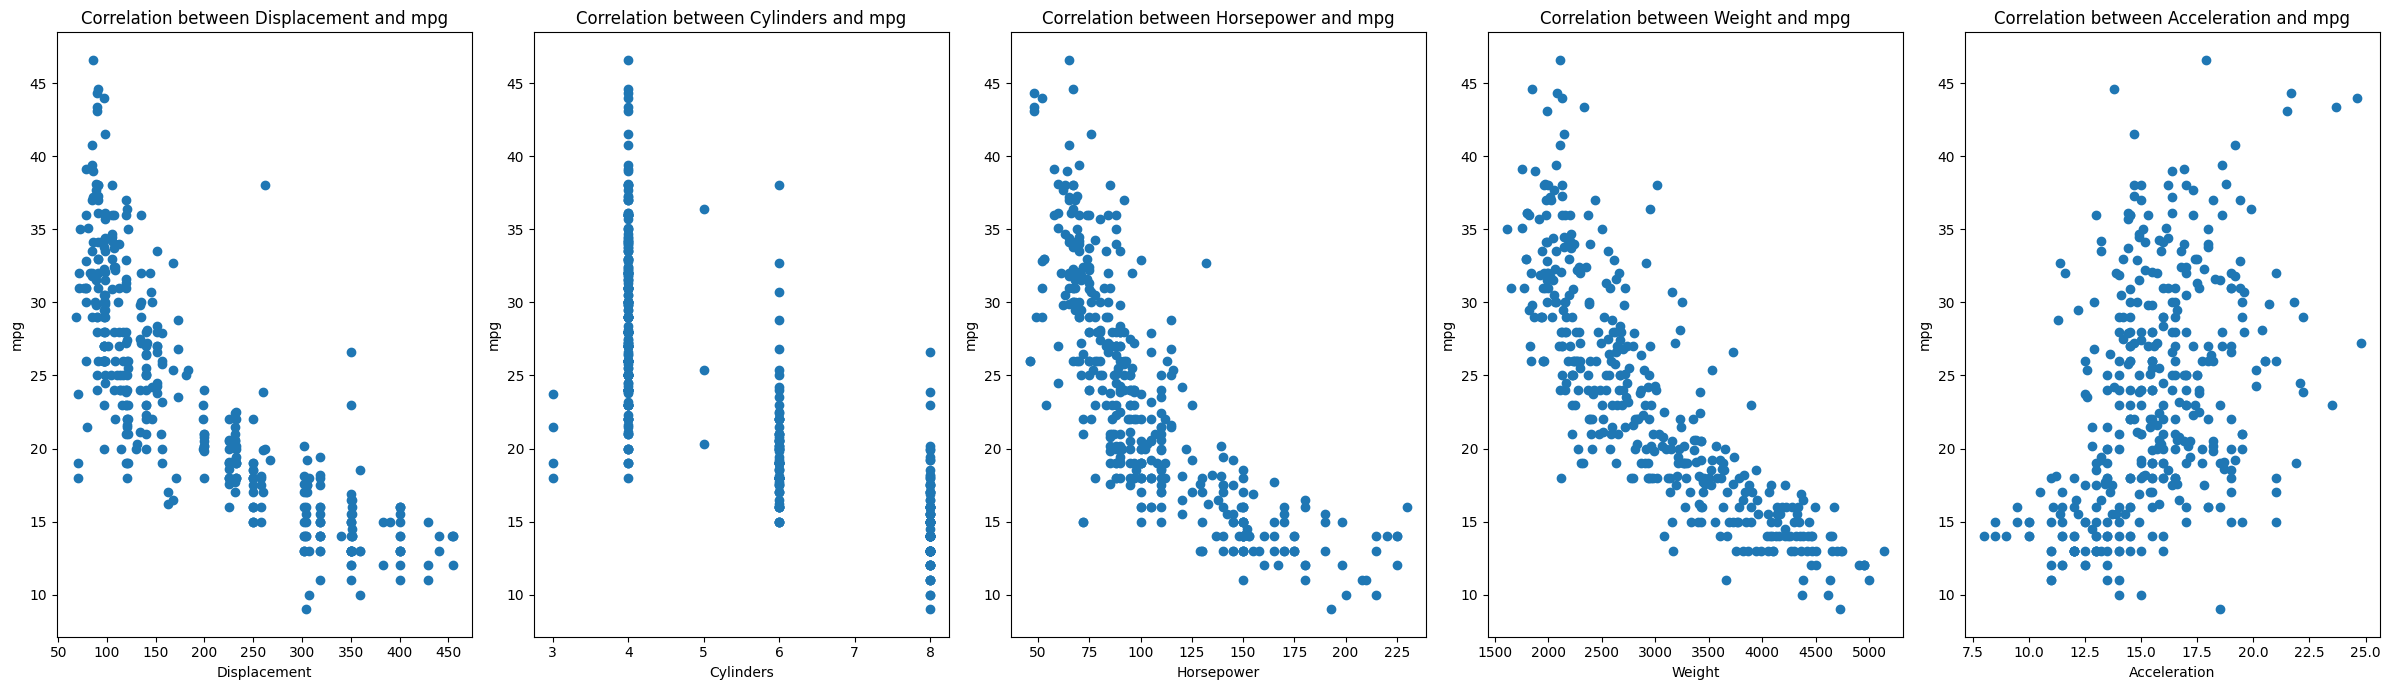

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 7))

columns_to_plot = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']

for i, column in enumerate(columns_to_plot):
    axes[i].plot(df[column], df['mpg'], 'o')
    axes[i].set_ylabel("mpg")
    axes[i].set_xlabel(column.capitalize())  # Capitalize the column name for better readability
    axes[i].set_title(f"Correlation between {column.capitalize()} and mpg")

plt.tight_layout()
plt.show()


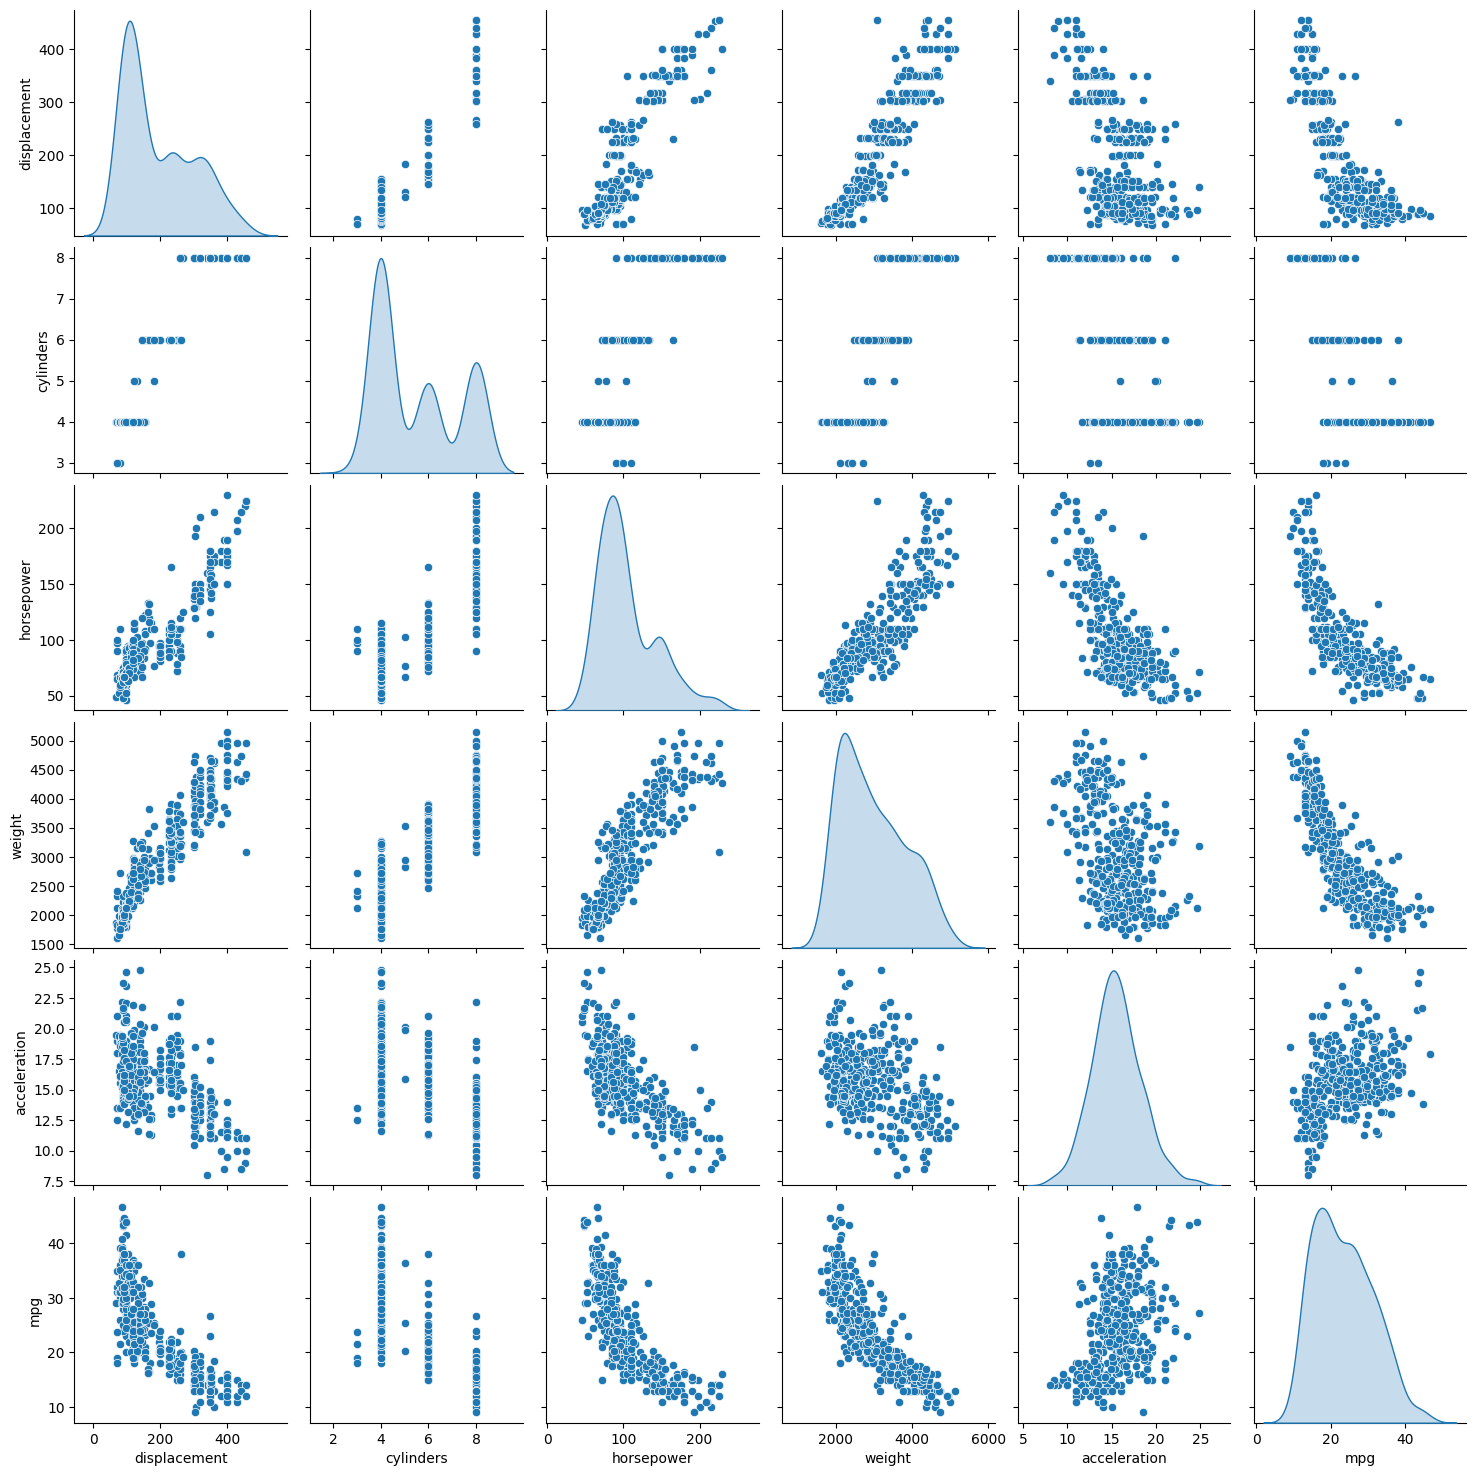

In [4]:
sns.pairplot(df.drop(["origin","model_year"], axis=1),diag_kind='kde')

In [5]:
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [6]:
X = df[['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
X_train

displacement  cylinders  horsepower  weight  acceleration
220          85.0        4.0        70.0  1945.0          16.8
256         225.0        6.0       100.0  3430.0          17.2
301         105.0        4.0        70.0  2200.0          13.2
193         200.0        6.0        81.0  3012.0          17.6
57          113.0        4.0        95.0  2278.0          15.5
..            ...        ...         ...     ...           ...
325          90.0        4.0        48.0  2085.0          21.7
194         232.0        6.0        90.0  3085.0          17.6
118         116.0        4.0        75.0  2158.0          15.5
48          250.0        6.0        88.0  3139.0          14.5
174         171.0        6.0        97.0  2984.0          14.5

[313 rows x 5 columns]

In [9]:
y_train

220    33.5
256    20.5
301    34.2
193    24.0
57     24.0
       ... 
325    44.3
194    22.5
118    24.0
48     18.0
174    18.0
Name: mpg, Length: 313, dtype: float64

In [10]:
X_test

displacement  cylinders  horsepower  weight  acceleration
146          90.0        4.0        75.0  2125.0          14.5
282         140.0        4.0        88.0  2890.0          17.3
69          350.0        8.0       160.0  4456.0          13.5
378         105.0        4.0        63.0  2125.0          14.7
331          97.0        4.0        67.0  2145.0          18.0
..            ...        ...         ...     ...           ...
101         198.0        6.0        95.0  2904.0          16.0
65          351.0        8.0       153.0  4129.0          13.0
56           91.0        4.0        70.0  1955.0          20.5
262         305.0        8.0       145.0  3425.0          13.2
216          98.0        4.0        68.0  2045.0          18.5

[79 rows x 5 columns]

y_test

In [11]:
model = LinearRegression()


In [12]:
X_train

displacement  cylinders  horsepower  weight  acceleration
220          85.0        4.0        70.0  1945.0          16.8
256         225.0        6.0       100.0  3430.0          17.2
301         105.0        4.0        70.0  2200.0          13.2
193         200.0        6.0        81.0  3012.0          17.6
57          113.0        4.0        95.0  2278.0          15.5
..            ...        ...         ...     ...           ...
325          90.0        4.0        48.0  2085.0          21.7
194         232.0        6.0        90.0  3085.0          17.6
118         116.0        4.0        75.0  2158.0          15.5
48          250.0        6.0        88.0  3139.0          14.5
174         171.0        6.0        97.0  2984.0          14.5

[313 rows x 5 columns]

In [13]:
model.fit(X_train, y_train)


LinearRegression()

### Calculate Performance on Test Set

In [14]:
test_predictions = model.predict(X_test)
test_predictions

array([29.64264494, 25.03571948, 12.05438496, 30.09314971, 30.16641283,
       22.59550159, 31.52270093, 24.04452313, 22.9243619 , 28.77803848,
       32.3680899 , 11.71010092, 25.82821683,  9.30646589, 12.94072464,
       29.16322502, 24.50900121, 14.63233885, 28.43428058, 26.18322813,
       20.52686098, 19.55260477, 28.09499539, 23.32427438, 29.53619261,
       13.21807946, 26.26356215, 25.85889462, 23.92109151, 16.77038883,
       23.39685116, 27.08125538, 27.73183144, 30.95507394, 22.73606394,
       25.84320547, 32.50715893, 12.2998185 , 13.84929617, 10.48793   ,
       16.26565988, 31.48606076, 27.52379012, 14.53616685, 30.67286958,
       13.24812899, 27.21157309, 11.02632815, 15.79130501, 24.56775402,
       28.92730394, 16.80729308, 11.27624842, 28.63229087, 29.31859574,
       23.39149332, 23.47331402, 21.00793121, 32.66054877, 28.96252041,
       24.43605612, 29.84899982, 30.62383807, 11.32945402, 29.83415957,
       18.15696594, 10.81757093, 26.60447561, 26.3254395 , 30.53

In [15]:
import numpy as np

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [16]:
MAE

3.357997027307806

In [17]:
MSE

19.00353025346302

In [18]:
RMSE

4.359303872576793

In [19]:
df['mpg'].mean()

23.445918367346938

### Plotting Residuals


In [20]:
test_predictions = model.predict(X_test)
test_res = y_test - test_predictions

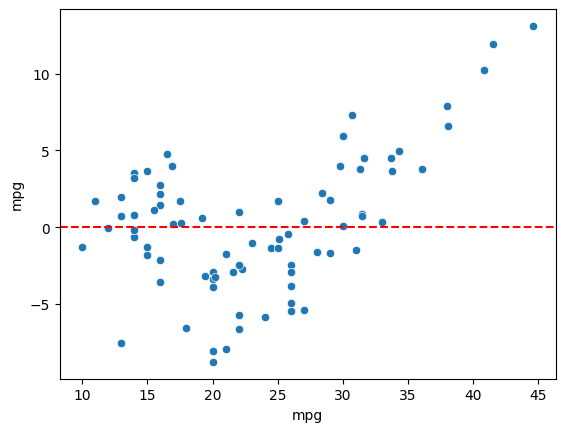

In [21]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [22]:
len(test_res)

79

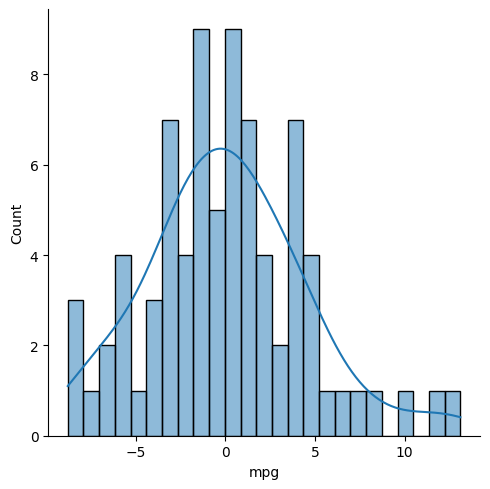

In [23]:
sns.displot(test_res,bins=25,kde=True)

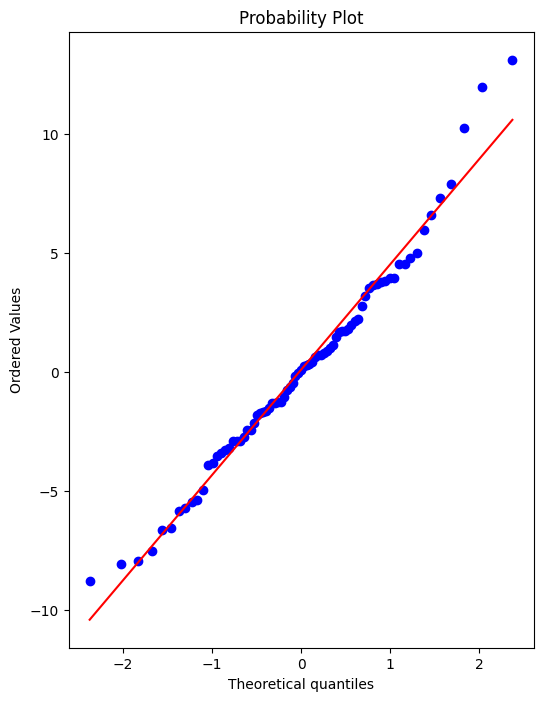

In [24]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

## Retraining Model on Full Data

In [25]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [26]:
y_hat = final_model.predict(X)

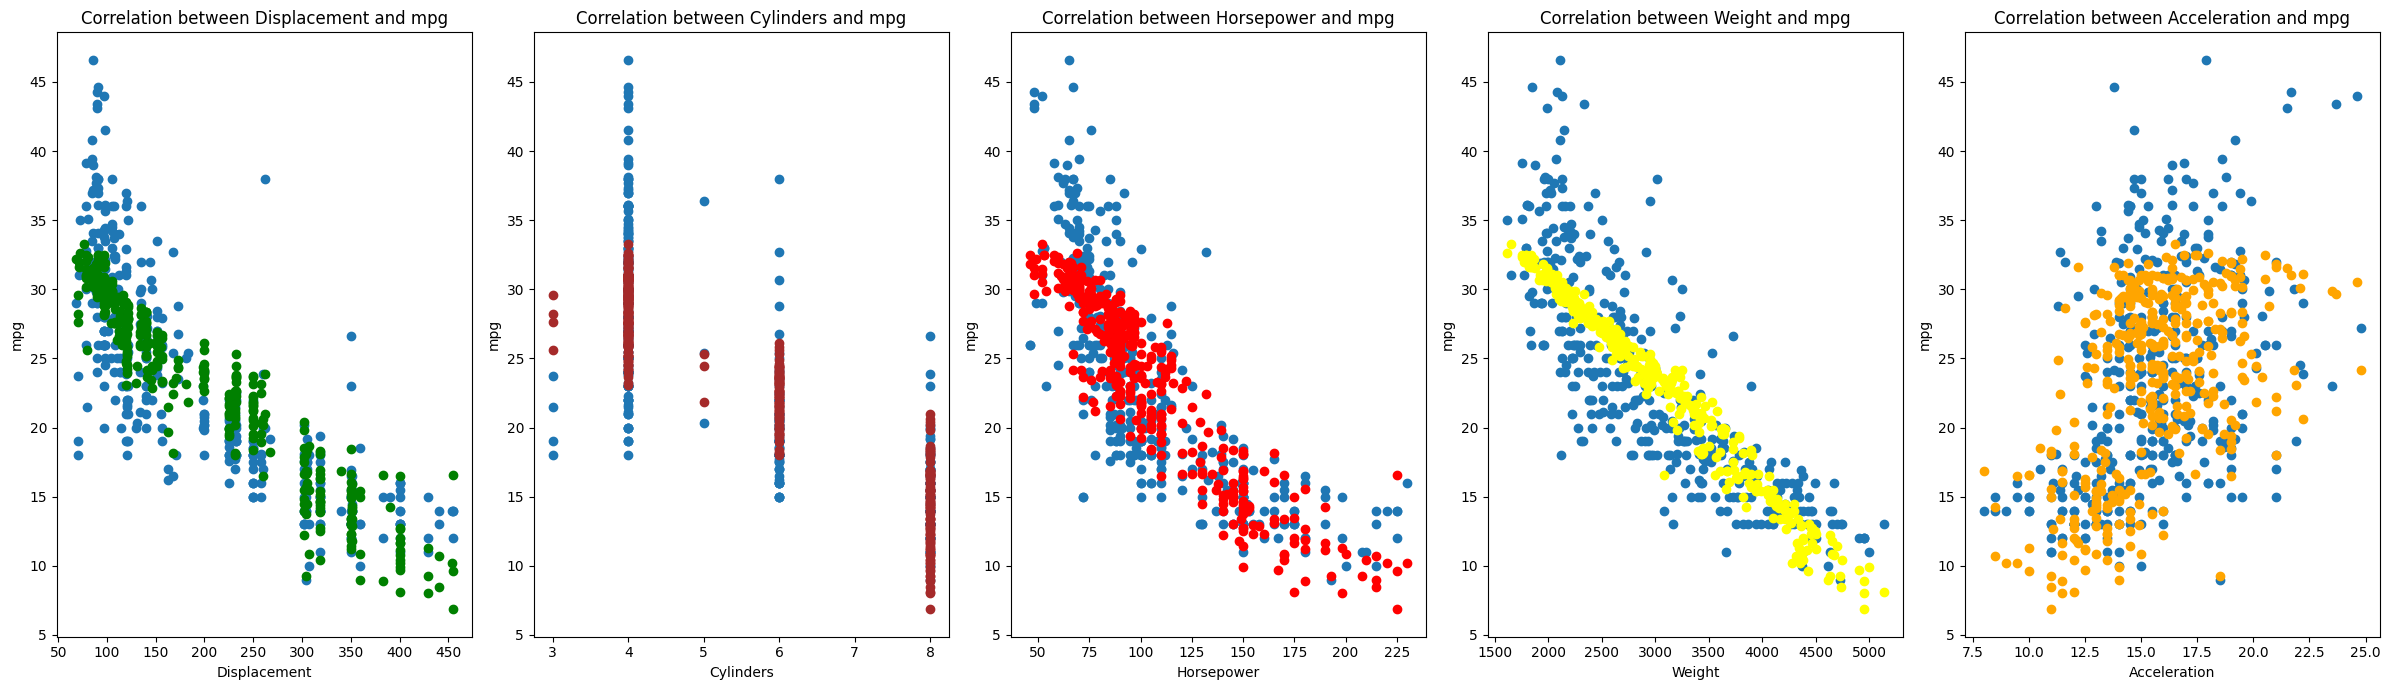

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24, 7))

columns_to_plot = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']
colors = ['green', 'brown', 'red', 'yellow', 'orange']
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df[column], df['mpg'], 'o')
    axes[i].plot(df[column], y_hat, 'o', color=colors[i])
    axes[i].set_ylabel("mpg")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_title(f"Correlation between {column.capitalize()} and mpg")

plt.tight_layout()
plt.show()

### Residuals

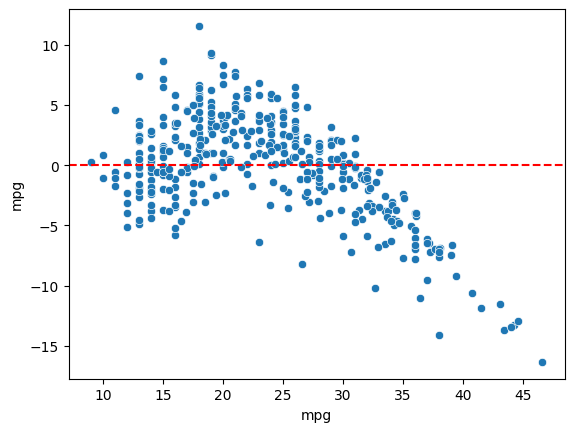

In [28]:
residuals = y_hat - y
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [29]:
final_model.coef_

array([-8.31301222e-05, -3.97928359e-01, -4.52570802e-02, -5.18691735e-03,
       -2.91047140e-02])

In [30]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
displacement    -0.000083
cylinders       -0.397928
horsepower      -0.045257
weight          -0.005187
acceleration    -0.029105

Interpreting the Coefficients:

Displacement: The coefficient is approximately -0.000083. This suggests that there is a very weak negative linear relationship between displacement and mpg. In other words, as displacement increases slightly, mpg tends to decrease slightly, but the effect is very small.

Cylinders: The coefficient is approximately -0.397928. This indicates a moderate negative linear relationship between the number of cylinders and mpg. As the number of cylinders in the engine increases, mpg tends to decrease. This is a significant relationship, suggesting that more cylinders generally lead to lower fuel efficiency.

Horsepower: The coefficient is approximately -0.045257. This suggests a weak negative linear relationship between horsepower and mpg. As horsepower increases slightly, mpg tends to decrease slightly. However, the effect is not as strong as the relationship with cylinders.

Weight: The coefficient is approximately -0.005187. This indicates a very weak negative linear relationship between the weight of the vehicle and mpg. As the weight of the vehicle increases slightly, mpg tends to decrease slightly, but the effect is minimal.

Acceleration: The coefficient is approximately -0.029105. This suggests a weak negative linear relationship between acceleration and mpg. As acceleration increases slightly, mpg tends to decrease slightly. However, like with displacement and weight, the effect is not very strong.

In [31]:
df.drop(["origin","model_year"],axis=1).corr()

displacement  cylinders  horsepower    weight  acceleration  \
displacement      1.000000   0.950823    0.897257  0.932994     -0.543800   
cylinders         0.950823   1.000000    0.842983  0.897527     -0.504683   
horsepower        0.897257   0.842983    1.000000  0.864538     -0.689196   
weight            0.932994   0.897527    0.864538  1.000000     -0.416839   
acceleration     -0.543800  -0.504683   -0.689196 -0.416839      1.000000   
mpg              -0.805127  -0.777618   -0.778427 -0.832244      0.423329   

                   mpg  
displacement -0.805127  
cylinders    -0.777618  
horsepower   -0.778427  
weight       -0.832244  
acceleration  0.423329  
mpg           1.000000

### Prediction on New Data

In [32]:
prediction = [[100,20,10,5,2]]
final_model.predict(prediction)

C:\Users\barri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.76071284])

In [33]:
from joblib import dump, load

dump(final_model, 'autompg_model.joblib')
loaded_model = load('autompg_model.joblib')
loaded_model.predict(prediction)

C:\Users\barri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.76071284])